1. Data Loading & Initial Exploration


In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk


In [268]:
# Set plot style
plt.style.use('ggplot')

In [269]:
# Load dataset
df = pd.read_csv('Reviews.csv')
print(df.shape)  # Print dataset dimensions
df


(568454, 10)


Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                          1                       1      5  1303862400   
1                          0                       0      1  1346976000   
2                          1                       1      4  1219017600   
3                          3                       3      2  1307923200   
4                          0                       0      5  1350777600   
...                      ...                     ...    ...         ...   
568449                     0                       0      5  1299628800   
568450                     0                       0      2  1331251200   
568451                     2                       2      5  1329782400   
568452                     1                       1      5  1331596800   
568453                     0                       0      5  1338422400   

                                   Summary  \
0                    Good Quality Dog Food   
1                        Not as Advertised   
2                    "Delight" says it all   
3                           Cough Medicine   
4                              Great taffy   
...                                    ...   
568449                 Will not do without   
568450                        disappointed   
568451            Perfect for our maltipoo   
568452  Favorite Training and reward treat   
568453                         Great Honey   

                                                     Text  
0       I have bought several of the Vitality canned d...  
1       Product arrived labeled as Jumbo Salted Peanut...  
2       This is a confection that has been around a fe...  
3       If you are looking for the secret ingredient i...  
4       Great taffy at a great price.  There was a wid...  
...                                                   ...  
568449  Great for sesame chicken..this is a good if no...  
568450  I'm disappointed with the flavor. The chocolat...  
568451  These stars are small, so you can give 10-15 o...  
568452  These are the BEST treats for training and rew...  
568453  I am very satisfied ,product is as advertised,...  

[568454 rows x 10 columns]

2. Data Analysis & Visualization


a. User Review Frequency Analysis


In [270]:
score_counts = df.groupby(['UserId']).size().reset_index(name='Counts')
score_counts[score_counts['Counts'] == score_counts['Counts'].max()]


UserId  Counts
182011  A3OXHLG6DIBRW8     448

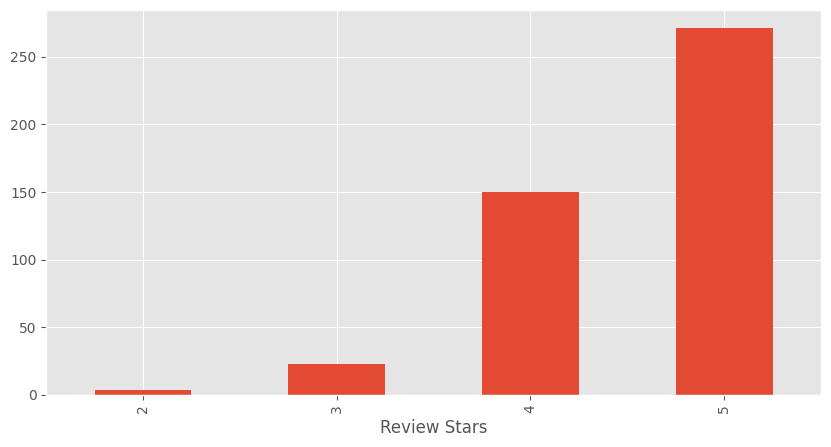

In [271]:
max_counts = df.loc[df['UserId'] == 'A3OXHLG6DIBRW8']
ax = max_counts['Score'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()


b. Most Active Users (Reviewers)

In [272]:
score_counts = df.groupby(['UserId']).size().reset_index(name='Counts')
score_counts = score_counts[score_counts['Counts'] > 200]  # Users with >200 reviews
user_id = score_counts['UserId'].tolist()
user_id.pop()  # Removes last user


'AY12DBB0U420B'

c. Multiple Users Review Distribution

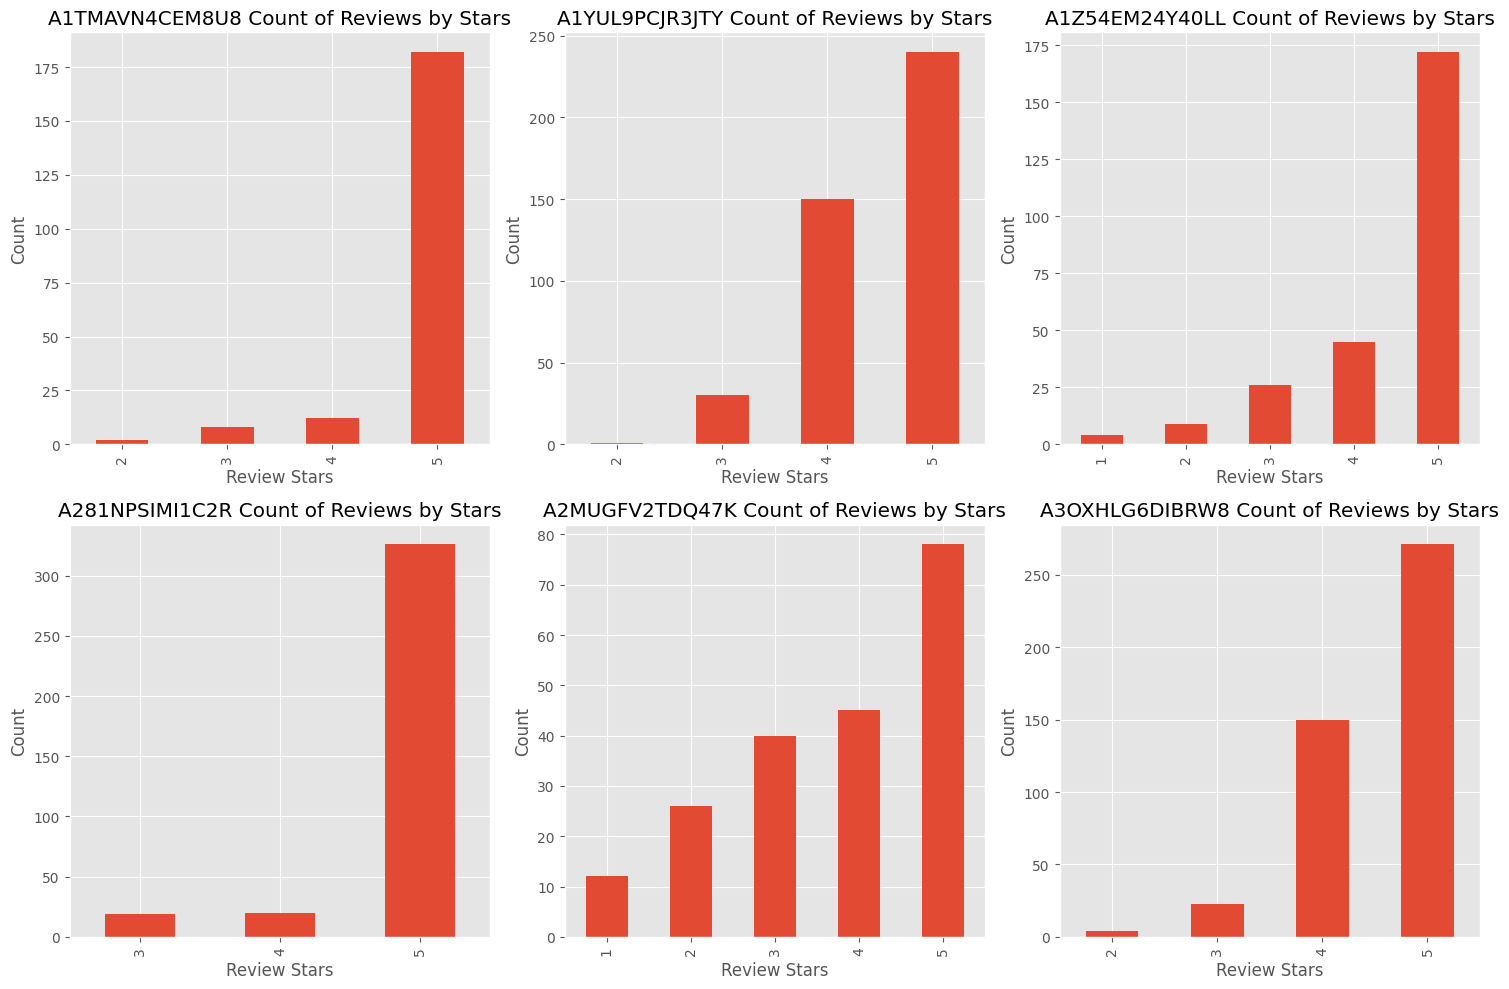

In [273]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  

for i, user_id in enumerate(user_id):
    max_counts = df.loc[df['UserId'] == user_id]
    ax = max_counts['Score'].value_counts().sort_index().plot(kind='bar', ax=axes[i], title=f'{user_id} Count of Reviews by Stars')
    ax.set_xlabel('Review Stars')
    ax.set_ylabel('Count')

for j in range(len(user_id), 6):  
    fig.delaxes(axes[j])  

plt.tight_layout()
plt.show()


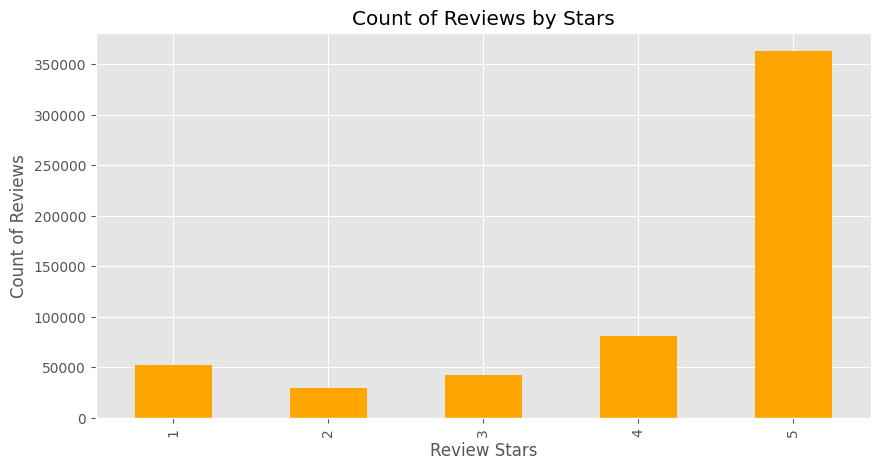

In [274]:
# Assuming the same data and DataFrame (df)
ax = df['Score'].value_counts().sort_index().plot(
    kind='bar',
    title='Count of Reviews by Stars',
    figsize=(10, 5),
    color='orange'
)
ax.set_xlabel('Review Stars')
ax.set_ylabel('Count of Reviews')
plt.show()

df = df.head(1000)

3. Text Length Analysis


a. Compute Statistics

In [275]:
df['text_length'] = df['Text'].apply(len)
mean_length = df['text_length'].mean()
std_length = df['text_length'].std()
print(f"Mean Length: {mean_length}, Std Dev: {std_length}")


Mean Length: 396.851, Std Dev: 383.09013149368366


C:\Users\harsh\AppData\Local\Temp\ipykernel_12356\1862284541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_length'] = df['Text'].apply(len)


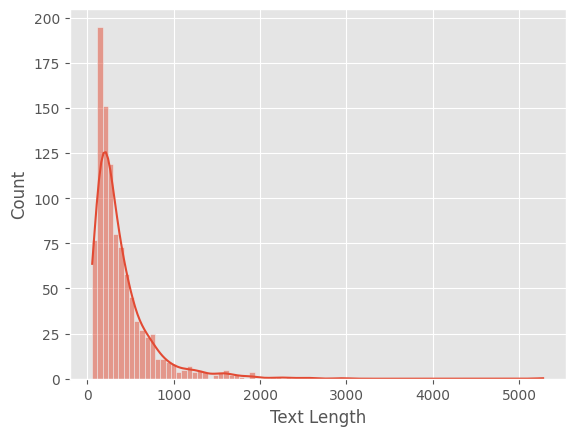

In [276]:
ax = sns.histplot(df['text_length'],kde=True)
ax.set_xlabel('Text Length')
plt.show()

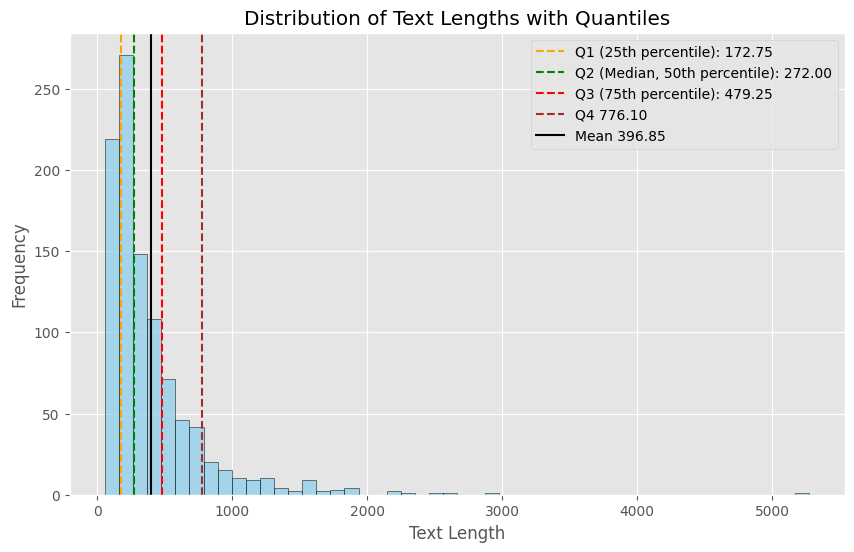

In [277]:

Q1 = df['text_length'].quantile(0.25)
Q2 = df['text_length'].quantile(0.50) 
Q3 = df['text_length'].quantile(0.75)
Q4 = df['text_length'].quantile(0.90)

# Plot histogram of text lengths
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=50, color="skyblue", edgecolor="black", alpha=0.7)
plt.axvline(Q1, color='orange', linestyle='--', label=f"Q1 (25th percentile): {Q1:.2f}")
plt.axvline(Q2, color='green', linestyle='--', label=f"Q2 (Median, 50th percentile): {Q2:.2f}")
plt.axvline(Q3, color='red', linestyle='--', label=f"Q3 (75th percentile): {Q3:.2f}")
plt.axvline(Q4, color = 'brown', linestyle = '--', label = f'Q4 {Q4:.2f}' )
plt.axvline(mean_length, color = 'black', linestyle = '-', label = f'Mean {mean_length:.2f}')
# Add labels and title
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("Distribution of Text Lengths with Quantiles")
plt.legend()
plt.show()

4. NLTK-Based Sentiment Analysis (VADER)


a. SentimentIntensityAnalyzer

In [278]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [279]:
# sample Sentiment Scores
sia.polarity_scores('I am so happy!')  
sia.polarity_scores('This is the worst thing ever.')


{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

b. Apply Sentiment Analysis to Dataset


In [280]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [281]:
vaders = pd.DataFrame(res).T  
vaders = vaders.reset_index().rename(columns={'index': 'Id'})  
vaders = vaders.merge(df, how='left')  
vaders.head()


Id    neg    neu    pos  compound   ProductId          UserId  \
0   1  0.000  0.695  0.305    0.9441  B001E4KFG0  A3SGXH7AUHU8GW   
1   2  0.138  0.862  0.000   -0.5664  B00813GRG4  A1D87F6ZCVE5NK   
2   3  0.091  0.754  0.155    0.8265  B000LQOCH0   ABXLMWJIXXAIN   
3   4  0.000  1.000  0.000    0.0000  B000UA0QIQ  A395BORC6FGVXV   
4   5  0.000  0.552  0.448    0.9468  B006K2ZZ7K  A1UQRSCLF8GW1T   

                       ProfileName  HelpfulnessNumerator  \
0                       delmartian                     1   
1                           dll pa                     0   
2  Natalia Corres "Natalia Corres"                     1   
3                             Karl                     3   
4    Michael D. Bigham "M. Wassir"                     0   

   HelpfulnessDenominator  Score        Time                Summary  \
0                       1      5  1303862400  Good Quality Dog Food   
1                       0      1  1346976000      Not as Advertised   
2                       1      4  1219017600  "Delight" says it all   
3                       3      2  1307923200         Cough Medicine   
4                       0      5  1350777600            Great taffy   

                                                Text  text_length  
0  I have bought several of the Vitality canned d...          263  
1  Product arrived labeled as Jumbo Salted Peanut...          190  
2  This is a confection that has been around a fe...          509  
3  If you are looking for the secret ingredient i...          219  
4  Great taffy at a great price.  There was a wid...          140

5. Visualization of VADER Sentiment Scores

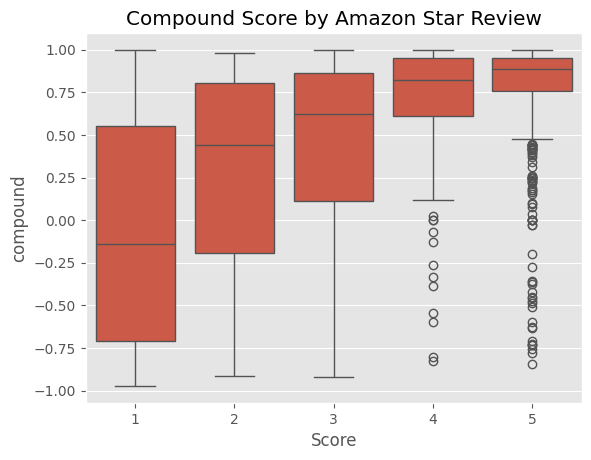

In [282]:
ax = sns.boxplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

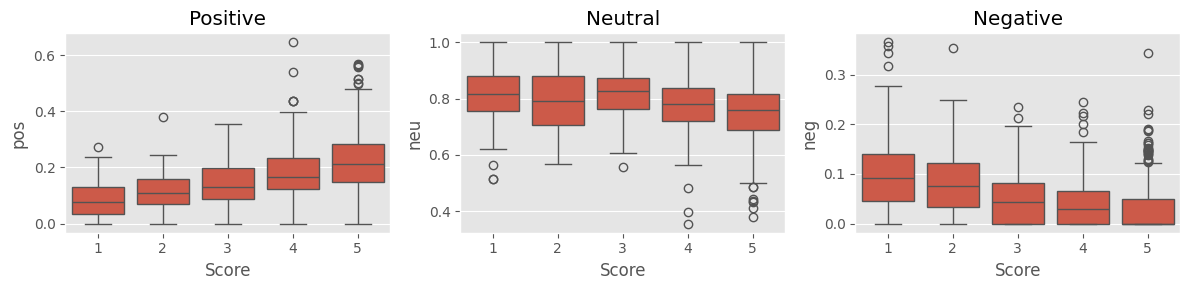

In [283]:
# Plot VADER results
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.boxplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.boxplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.boxplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

6. Transformer-Based Sentiment Analysis (RoBERTa)


a. Load Pretrained RoBERTa Model

In [284]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


b. Apply RoBERTa to Full Dataset

In [285]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    return {'roberta_neg': scores[0], 'roberta_neu': scores[1], 'roberta_pos': scores[2]}


res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')


  0%|          | 0/1000 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863


In [286]:
roberta_df = pd.DataFrame(res).T.reset_index().rename(columns={'index': 'Id'})
roberta_df = roberta_df.merge(df, how='left')

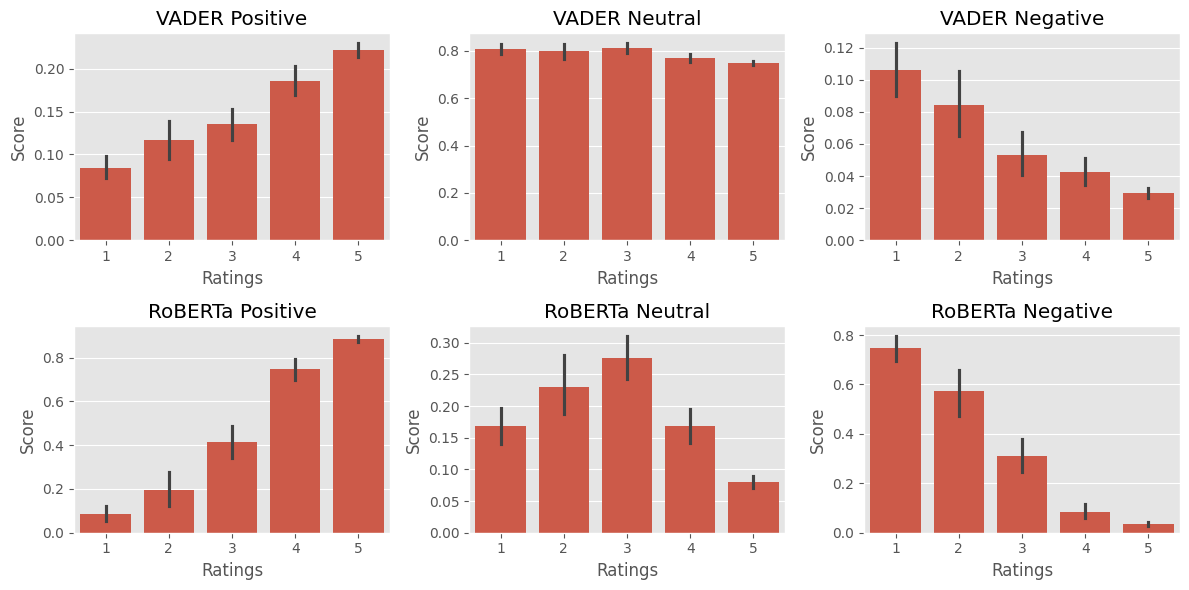

In [287]:
ig, axs = plt.subplots(2, 3, figsize=(12, 6))

sns.barplot(data=roberta_df, x='Score', y='vader_pos', ax=axs[0, 0])
sns.barplot(data=roberta_df, x='Score', y='vader_neu', ax=axs[0, 1])
sns.barplot(data=roberta_df, x='Score', y='vader_neg', ax=axs[0, 2])
sns.barplot(data=roberta_df, x='Score', y='roberta_pos', ax=axs[1, 0])
sns.barplot(data=roberta_df, x='Score', y='roberta_neu', ax=axs[1, 1])
sns.barplot(data=roberta_df, x='Score', y='roberta_neg', ax=axs[1, 2])

axs[0, 0].set_title('VADER Positive')
axs[0, 1].set_title('VADER Neutral')
axs[0, 2].set_title('VADER Negative')
axs[1, 0].set_title('RoBERTa Positive')
axs[1, 1].set_title('RoBERTa Neutral')
axs[1, 2].set_title('RoBERTa Negative')

axs[0, 0].set_xlabel('Ratings')
axs[0, 1].set_xlabel('Ratings')
axs[0, 2].set_xlabel('Ratings')
axs[1, 0].set_xlabel('Ratings')
axs[1, 1].set_xlabel('Ratings')
axs[1, 2].set_xlabel('Ratings')

axs[0, 0].set_ylabel('Score')
axs[0, 1].set_ylabel('Score')
axs[0, 2].set_ylabel('Score')
axs[1, 0].set_ylabel('Score')
axs[1, 1].set_ylabel('Score')
axs[1, 2].set_ylabel('Score')

plt.tight_layout()
plt.show()

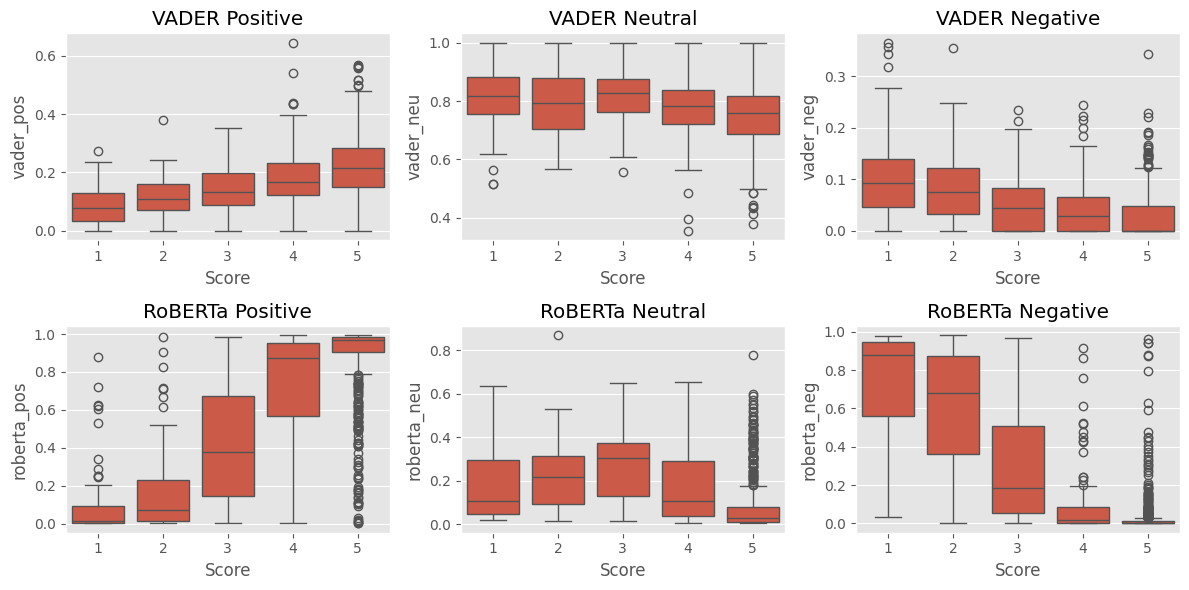

In [288]:
fig, axs = plt.subplots(2, 3, figsize=(12, 6))

sns.boxplot(data=roberta_df, x='Score', y='vader_pos', ax=axs[0, 0])
sns.boxplot(data=roberta_df, x='Score', y='vader_neu', ax=axs[0, 1])
sns.boxplot(data=roberta_df, x='Score', y='vader_neg', ax=axs[0, 2])
sns.boxplot(data=roberta_df, x='Score', y='roberta_pos', ax=axs[1, 0])
sns.boxplot(data=roberta_df, x='Score', y='roberta_neu', ax=axs[1, 1])
sns.boxplot(data=roberta_df, x='Score', y='roberta_neg', ax=axs[1, 2])

axs[0, 0].set_title('VADER Positive')
axs[0, 1].set_title('VADER Neutral')
axs[0, 2].set_title('VADER Negative')
axs[1, 0].set_title('RoBERTa Positive')
axs[1, 1].set_title('RoBERTa Neutral')
axs[1, 2].set_title('RoBERTa Negative')

plt.tight_layout()
plt.show()

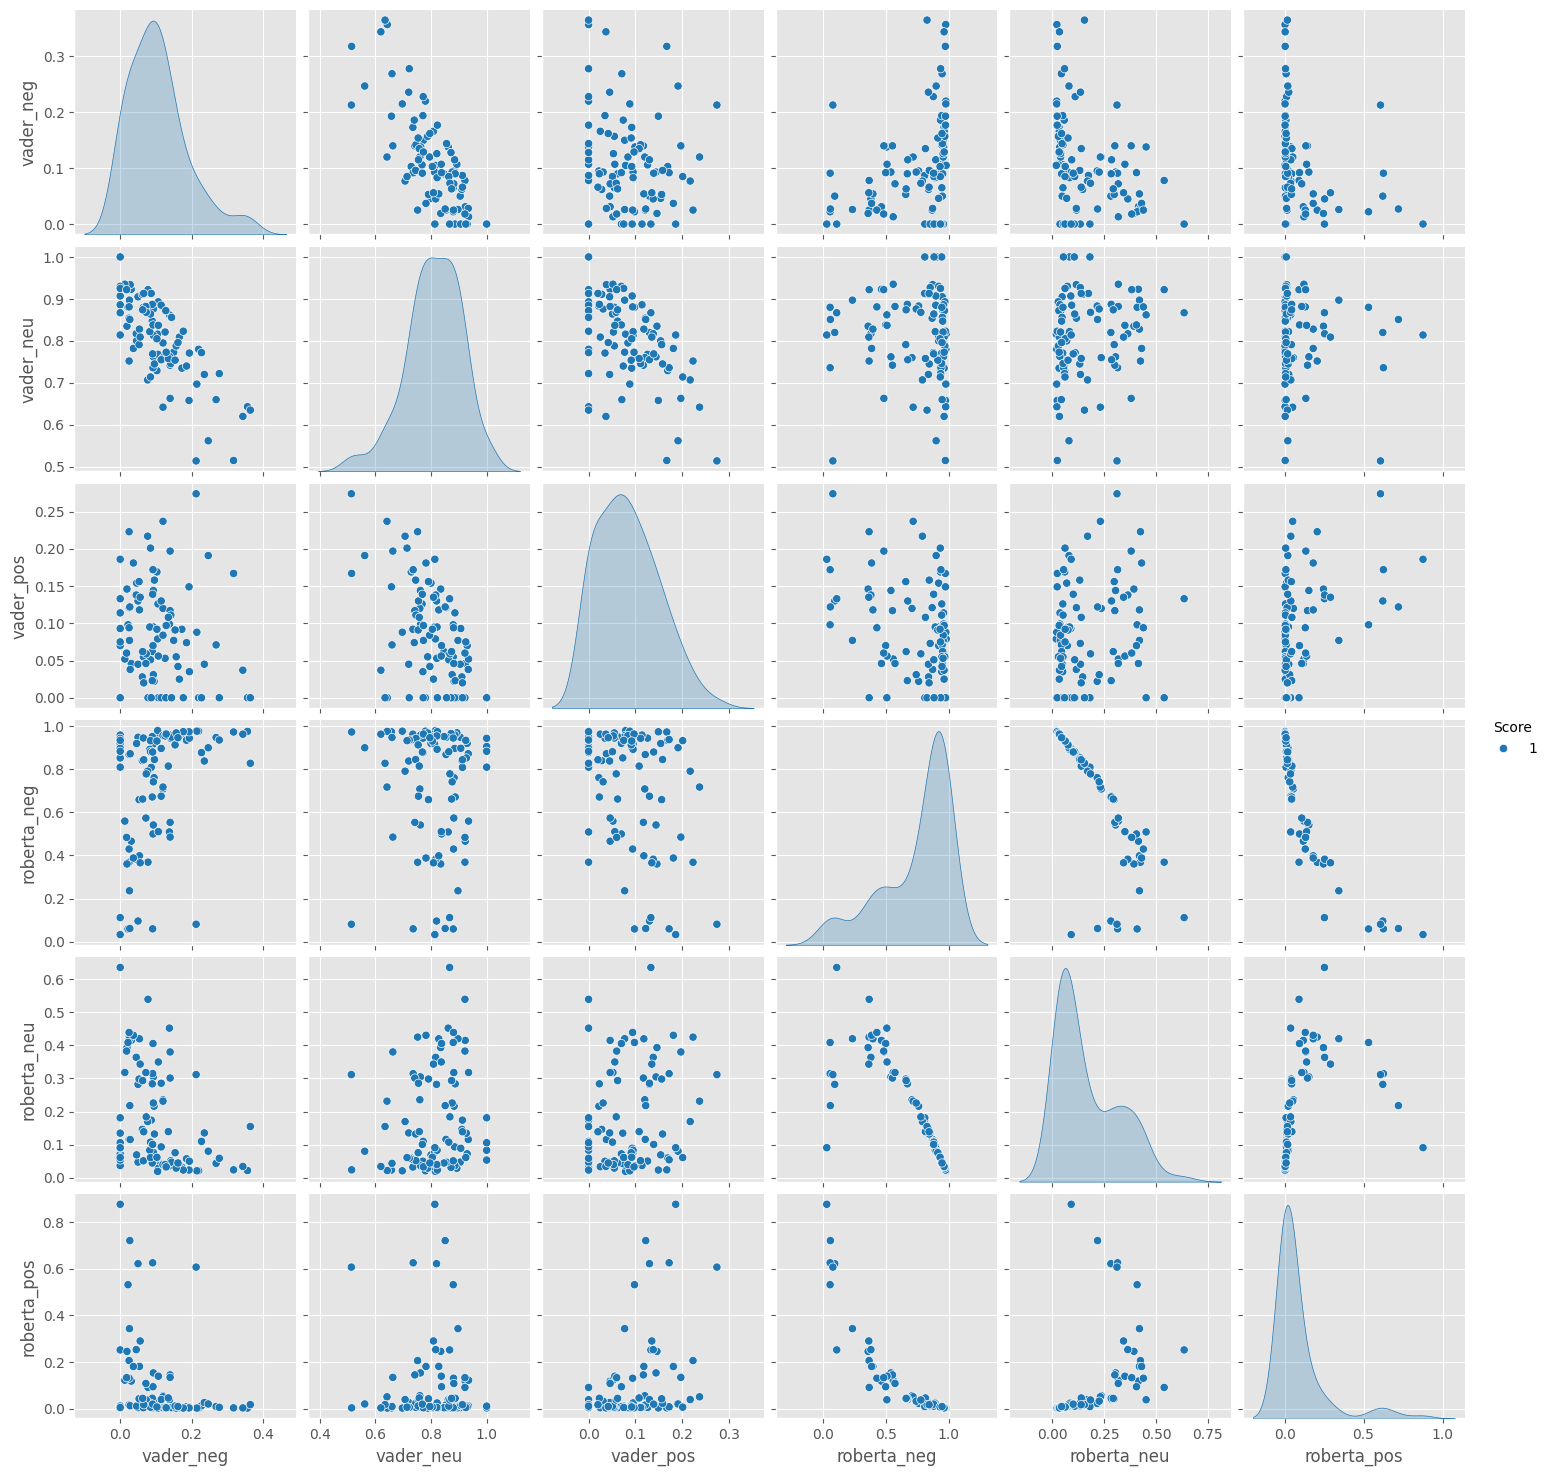

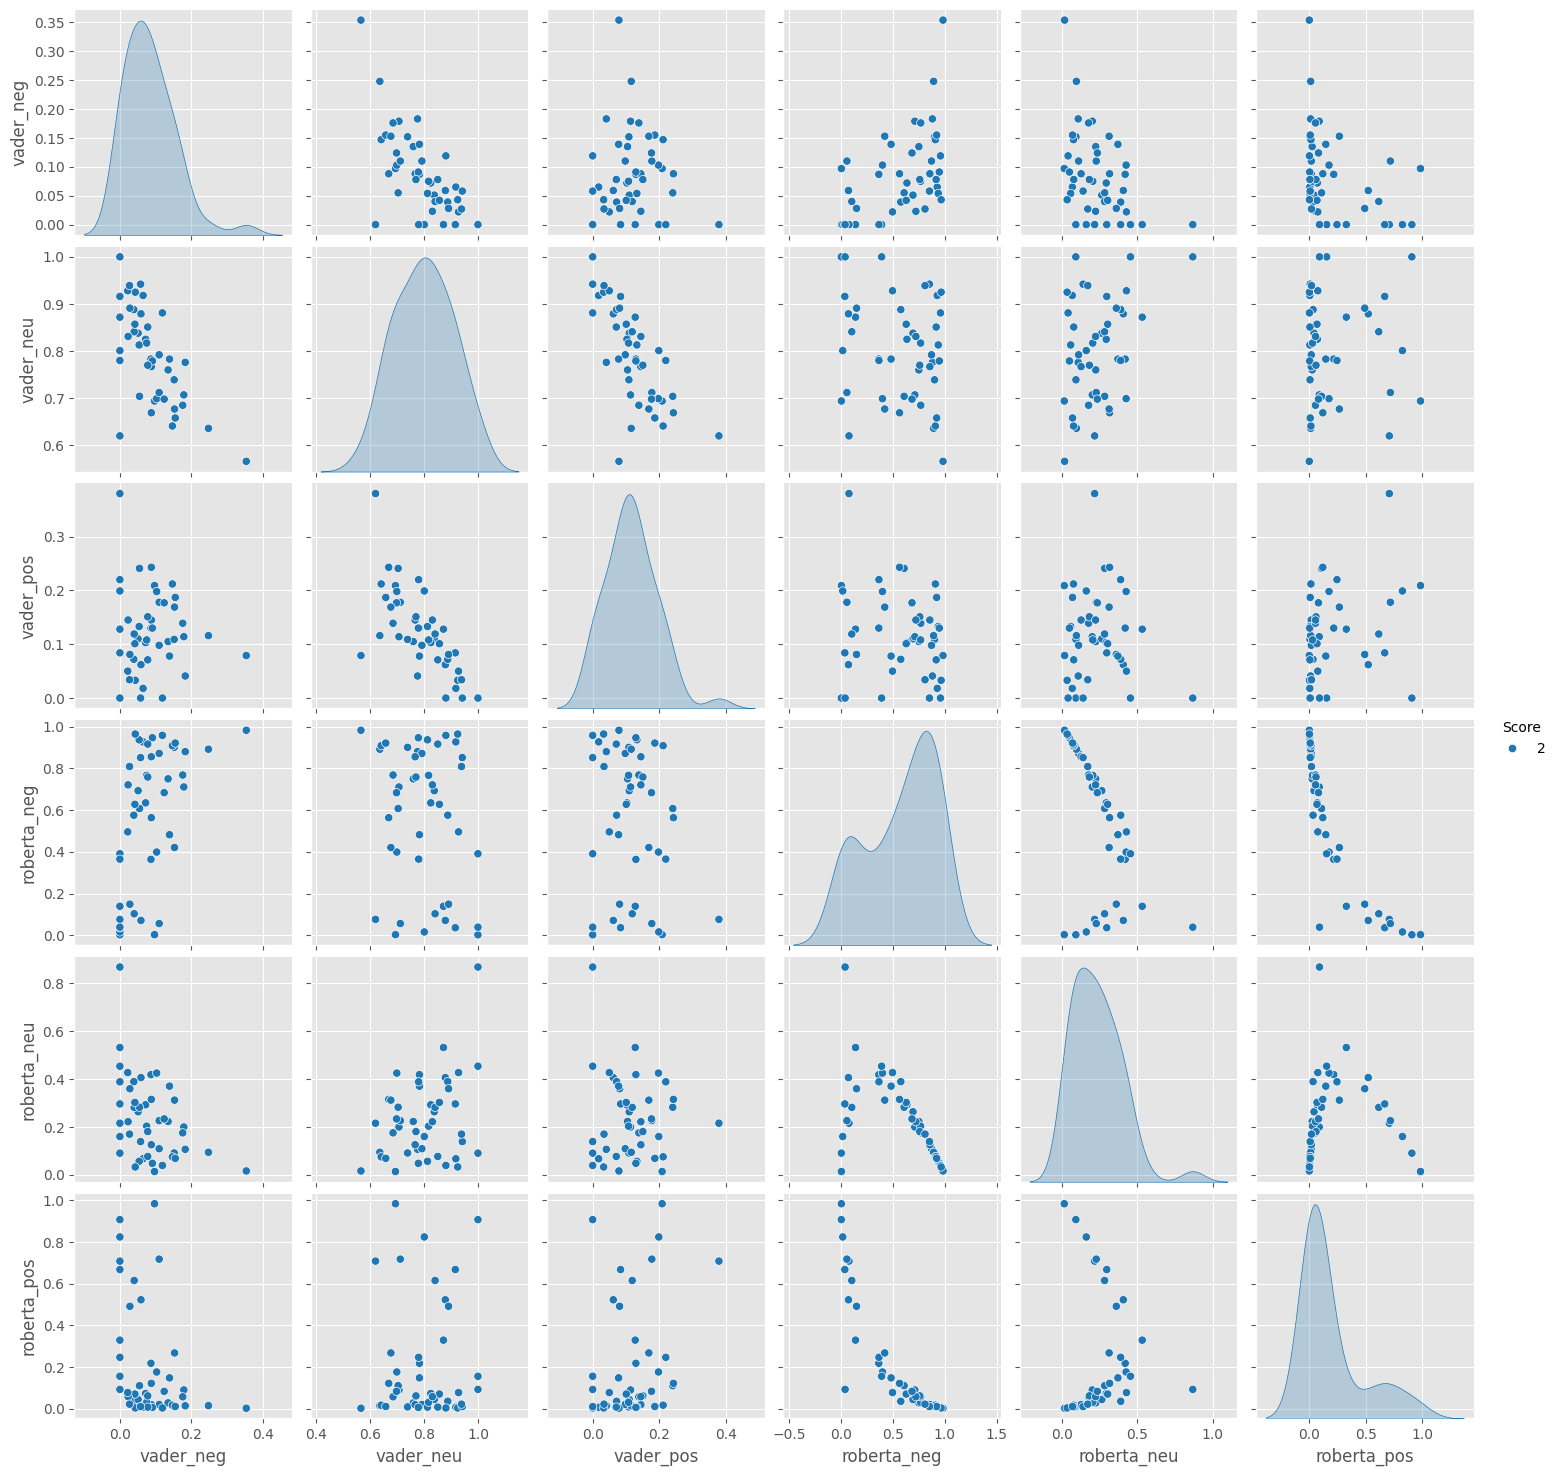

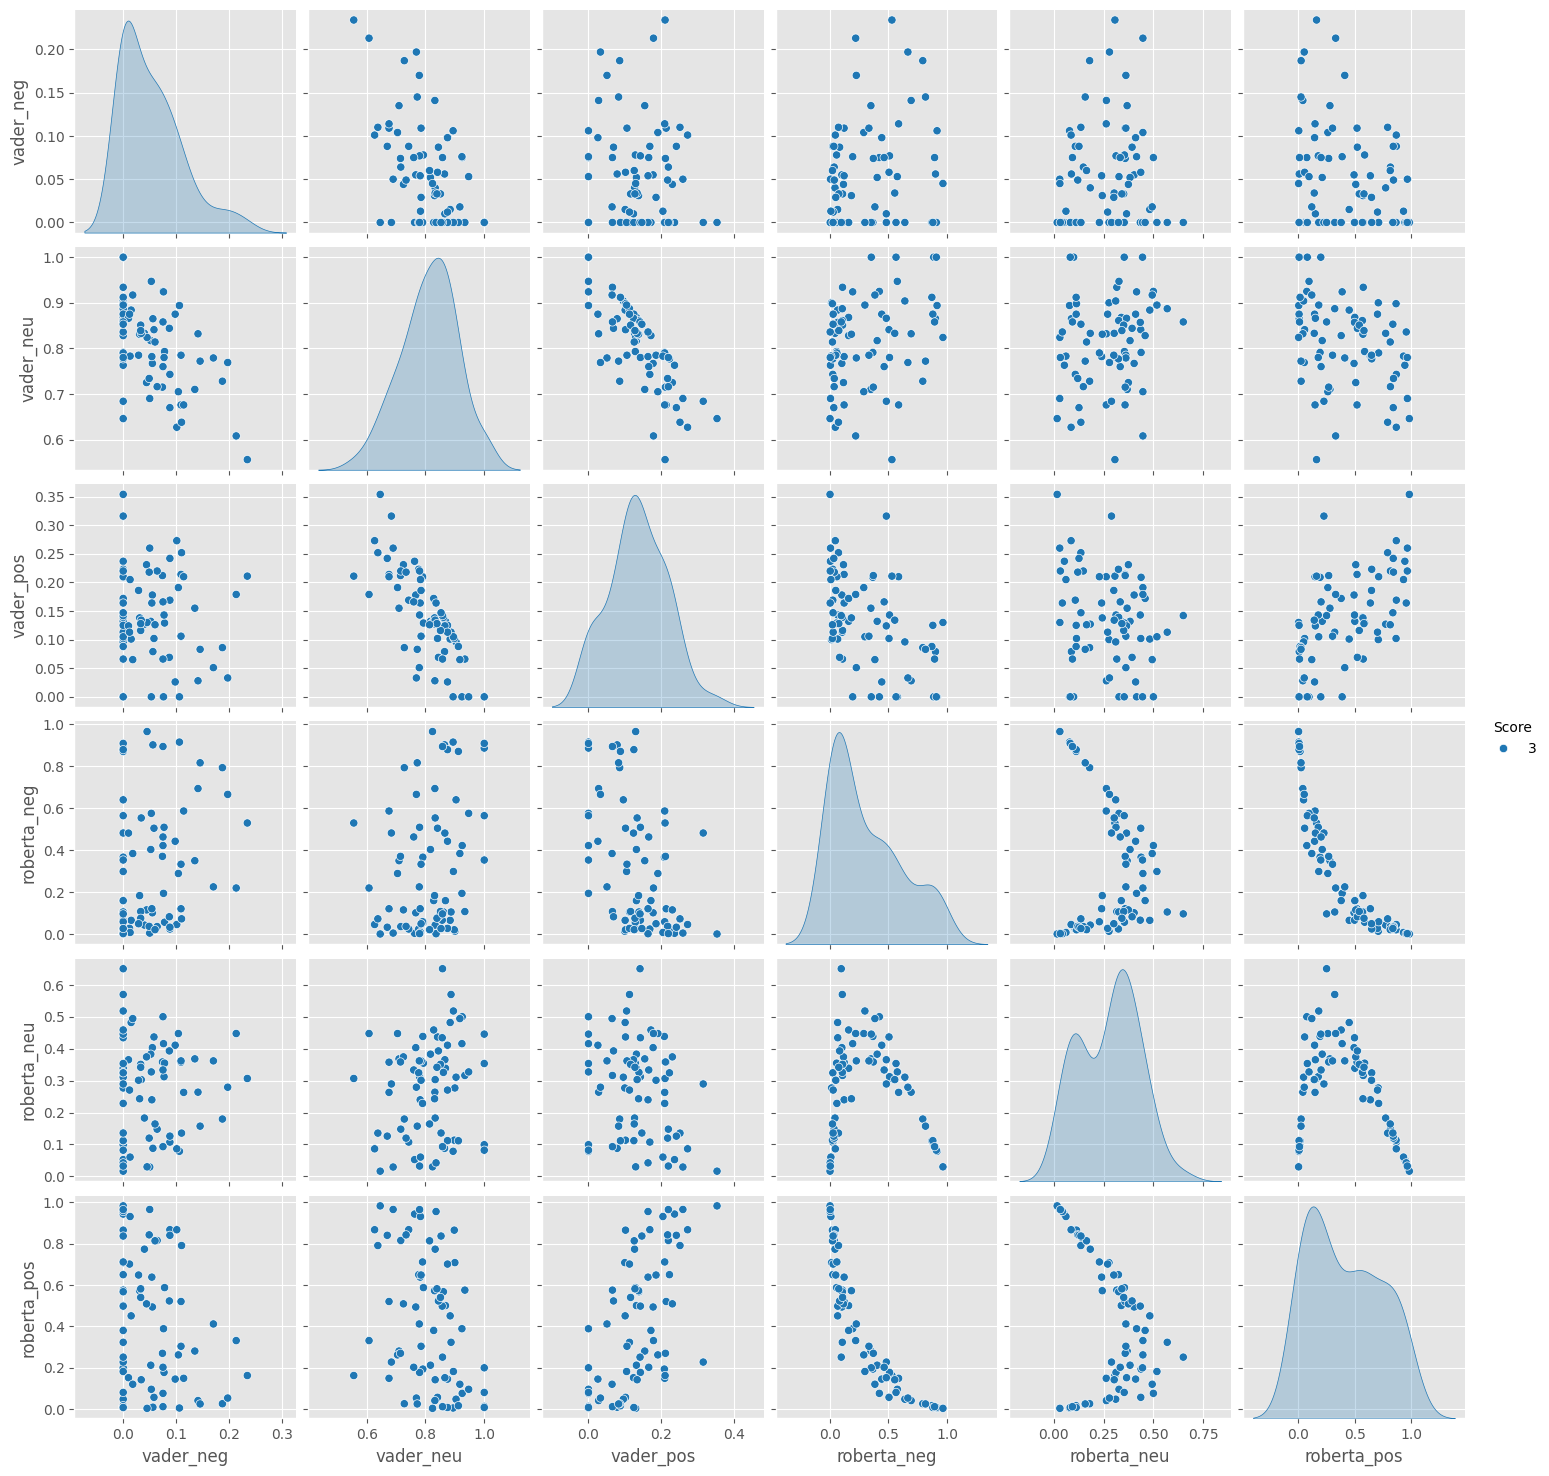

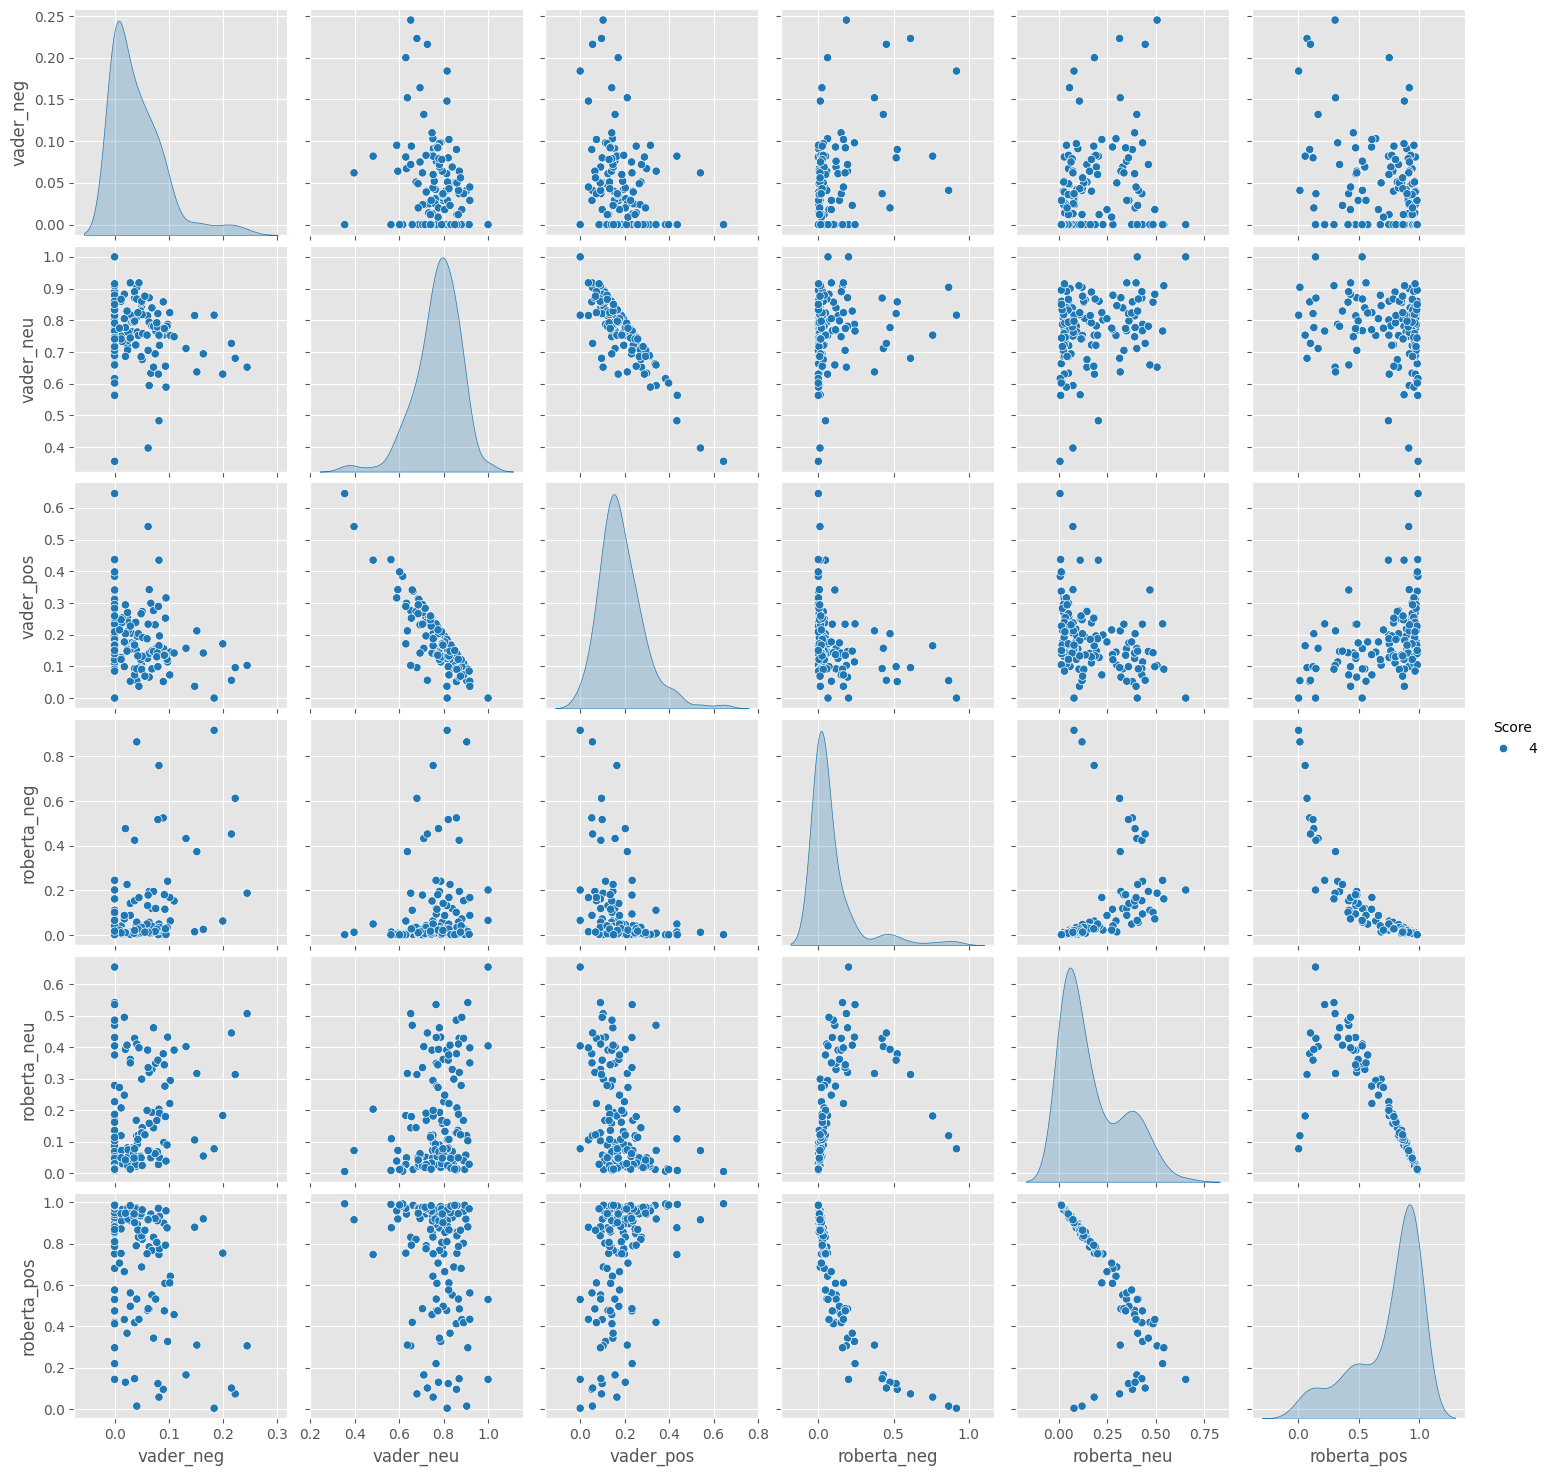

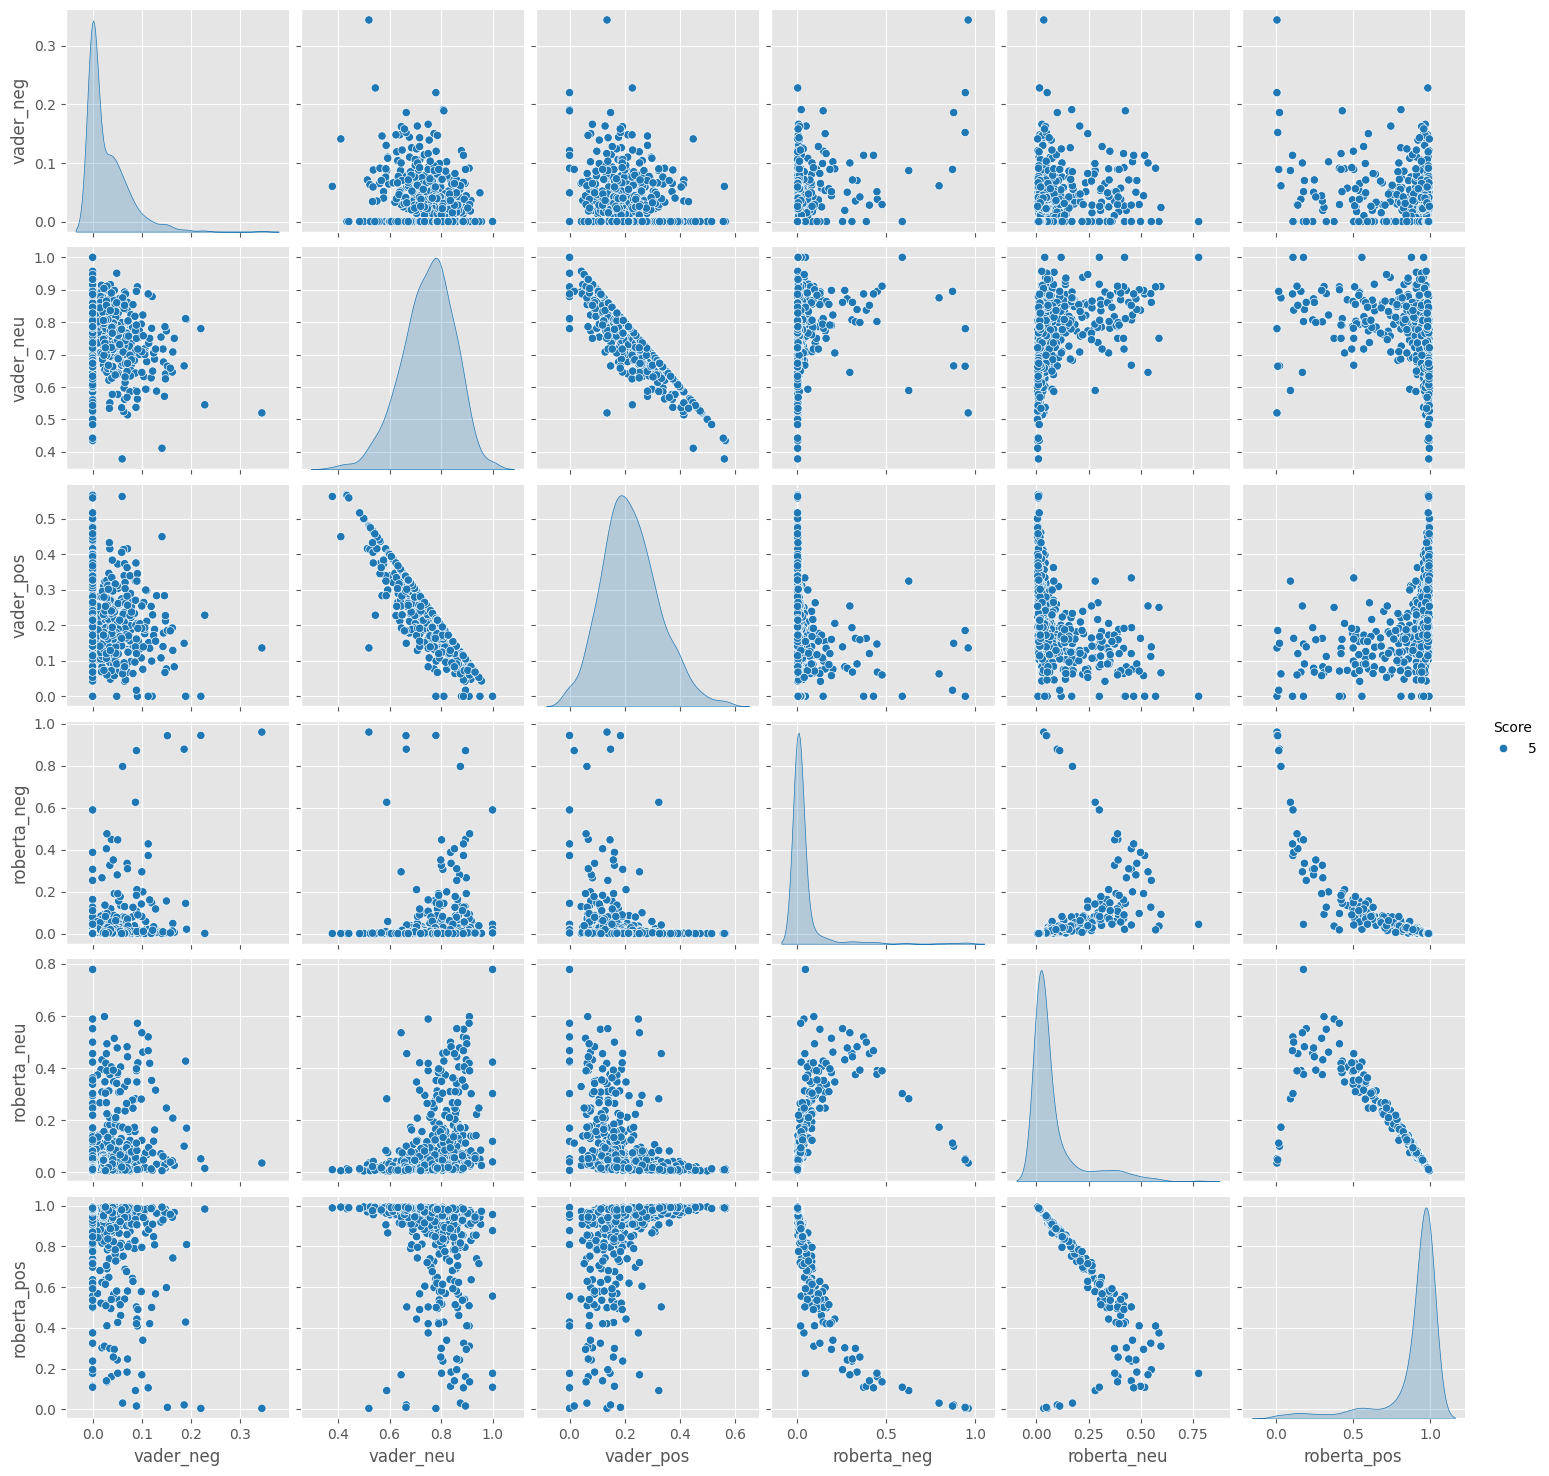

In [289]:
# Combine and compare
for score in range(1,6):
    sns.pairplot(data=roberta_df.loc[roberta_df['Score']==score],
                 vars=['vader_neg', 'vader_neu', 'vader_pos',
                      'roberta_neg', 'roberta_neu', 'roberta_pos'],
                hue='Score',
                palette='tab10')
    plt.show()

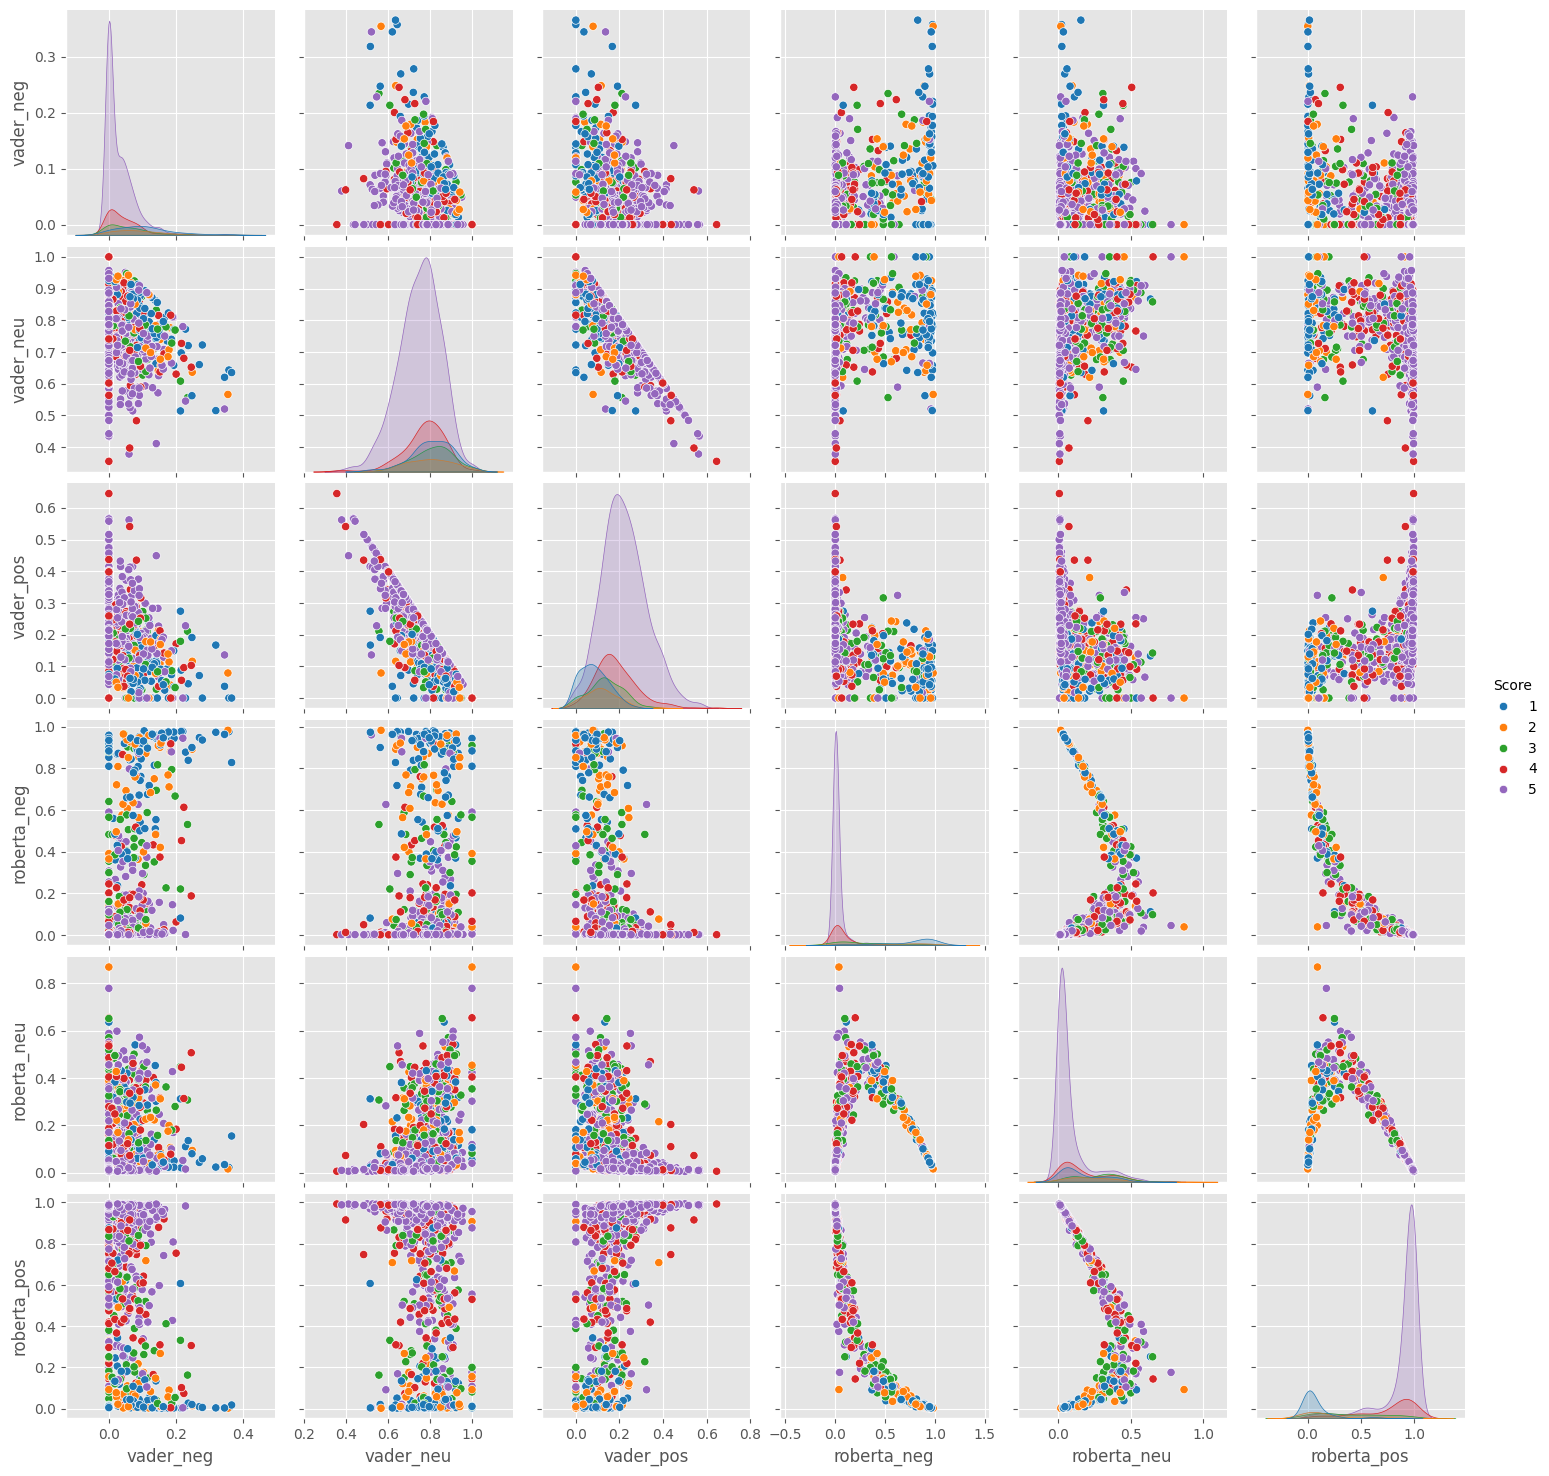

In [290]:

sns.pairplot(data=roberta_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

# Review Examples:
Lets look at some examples where the model scoring and review score differ the most.

- Positive 1-Star

In [291]:
roberta_df.query('Score == 1').sort_values('roberta_pos', ascending=False)['Text'].values[0]

"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

In [292]:
roberta_df.query('Score == 1').sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

Negative 5-Star Reviews

In [293]:
roberta_df.query('Score == 5').sort_values('roberta_neg', ascending=False)['Text'].values[1]

"If this flavor lasted longer than it does, I'd probably die of starvation for lack of wanting to take it out of my mouth."

In [294]:
roberta_df.query('Score == 5').sort_values('vader_neg', ascending=False)['Text'].values[1]

'I love using this to sweeten tea, coffee, etc. It tastes much better than other low glycemic sweeteners - there is no bitter aftertaste.'

In [295]:
print("Processing Complete.")

Processing Complete.
